# visualize source time courses(stcs)

In [1]:
# surface source estimates

import os.path as op

import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import sample, fetch_hcp_mmp_parcellation
from mne.minimum_norm import apply_inverse, read_inverse_operator
from mne import read_evokeds

data_path = sample.data_path()
meg_path = data_path / 'MEG' / 'sample'
subjects_dir = data_path / 'subjects'

fname_evoked = meg_path / 'sample_audvis-ave.fif'
fname_stc = meg_path / 'sample_audvis-meg'
fetch_hcp_mmp_parcellation(subjects_dir)

In [2]:
stc = mne.read_source_estimate(fname_stc, subject='sample')

Using notebook 3d backend.



<IPython.core.display.Javascript object>


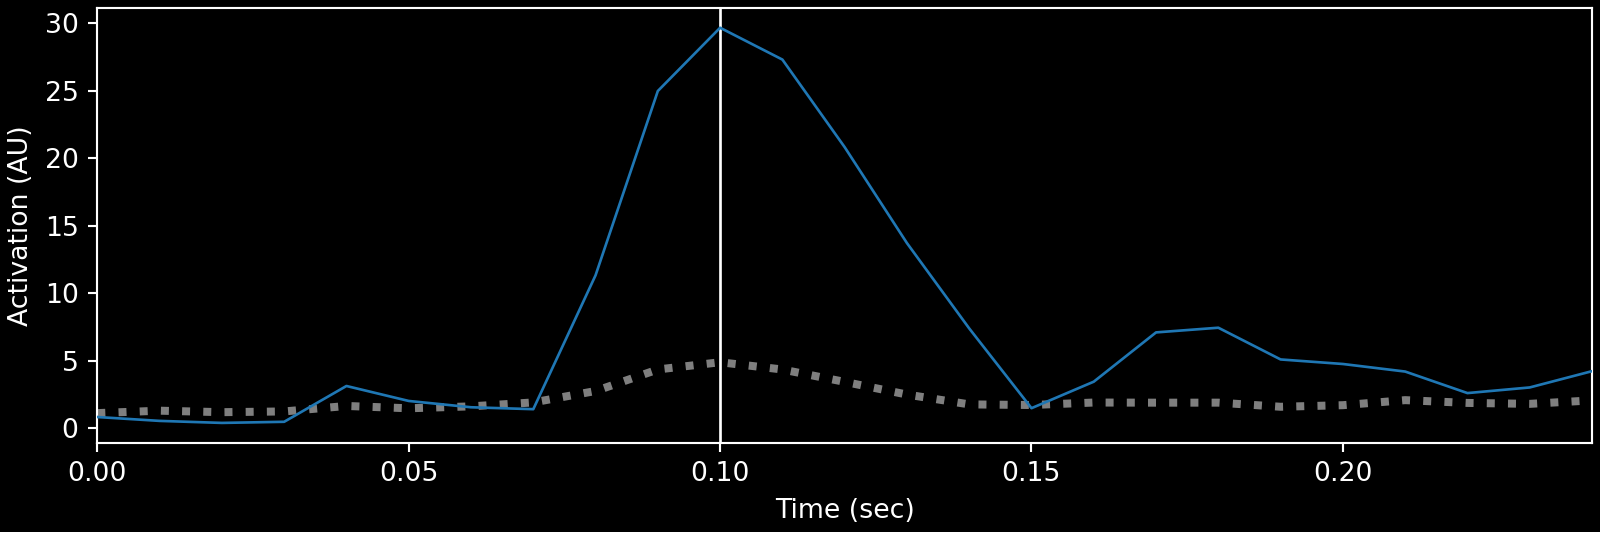

In [3]:
initial_time = 0.1
brain = stc.plot(subjects_dir=subjects_dir, initial_time=initial_time,
                 clim=dict(kind='value', lims=[3, 6, 9]),
                 smoothing_steps=7)

In [4]:
stc_fs = mne.compute_source_morph(stc, 'sample', 'fsaverage', subjects_dir,
                                  smooth=5, verbose='error').apply(stc)
brain = stc_fs.plot(subjects_dir=subjects_dir, initial_time=initial_time,
                    clim=dict(kind='value', lims=[3, 6, 9]),
                    surface='flat', hemi='both', size=(1000, 500),
                    smoothing_steps=5, time_viewer=False,
                    add_data_kwargs=dict(
                        colorbar_kwargs=dict(label_font_size=10)))

# to help orient us, let's add a parcellation (red=auditory, green=motor,
# blue=visual)
brain.add_annotation('HCPMMP1_combined', borders=2)

# You can save a movie like the one on our documentation website with:
# brain.save_movie(time_dilation=20, tmin=0.05, tmax=0.16,
#                  interpolation='linear', framerate=10)

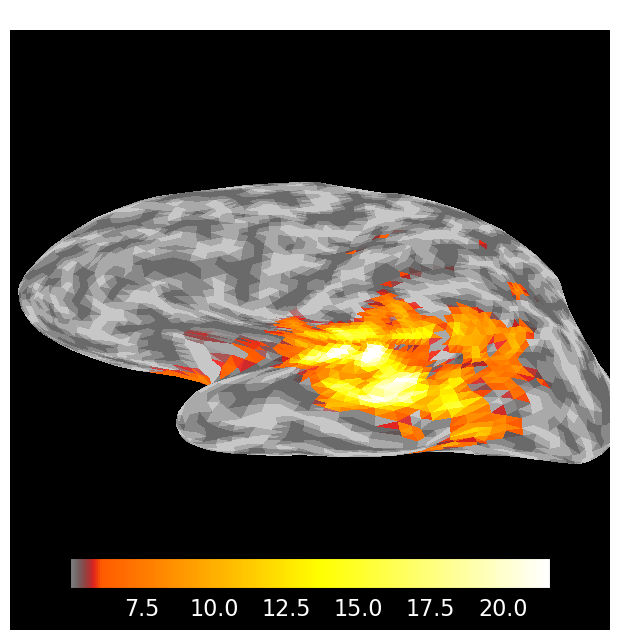

In [5]:
mpl_fig = stc.plot(subjects_dir=subjects_dir, initial_time=initial_time,
                   backend='matplotlib', verbose='error', smoothing_steps=7)

# volume source estimates


In [6]:
evoked = read_evokeds(fname_evoked, condition=0, baseline=(None, 0))
evoked.pick_types(meg=True, eeg=False).crop(0.05, 0.15)
# this risks aliasing, but these data are very smooth
evoked.decimate(10, verbose='error')

Reading /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


<Evoked | 'Left Auditory' (average, N=55), 0.049949 – 0.14985 sec, baseline -0.199795 – 0 sec (baseline period was cropped after baseline correction), 305 ch, ~3.2 MB>

In [7]:
fname_inv = meg_path / 'sample_audvis-meg-vol-7-meg-inv.fif'
inv = read_inverse_operator(fname_inv)
src = inv['src']
mri_head_t = inv['mri_head_t']

Reading inverse operator decomposition from /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-vol-7-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    11271 x 11271 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    Did not find the desired covariance matrix (kind = 6)
    11271 x 11271 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    [done]
    1 source spaces read
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Av

In [8]:
snr = 3.0
lambda2 = 1.0 / snr ** 2
method = "dSPM"  # use dSPM method (could also be MNE or sLORETA)
stc = apply_inverse(evoked, inv, lambda2, method)
del inv

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "Left Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  77.1% variance
    Combining the current components...
    dSPM...
[done]


Showing: t = 0.100 s, (-47.3, -19.0, -6.3) mm, [4, 9, 10] vox, 5653 vertex
Using control points [ 7.67635542  9.11717401 20.19136023]


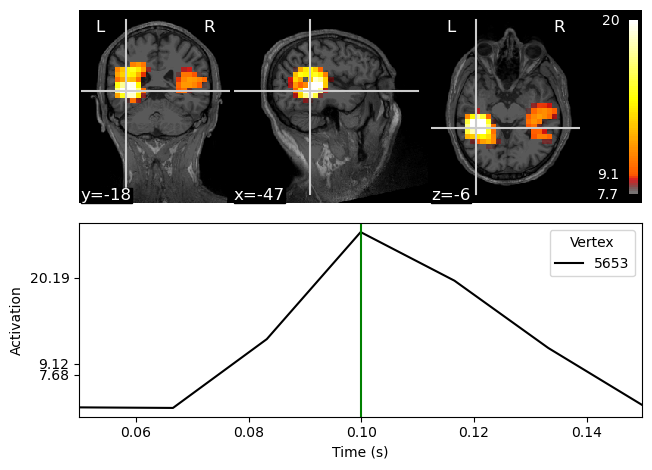

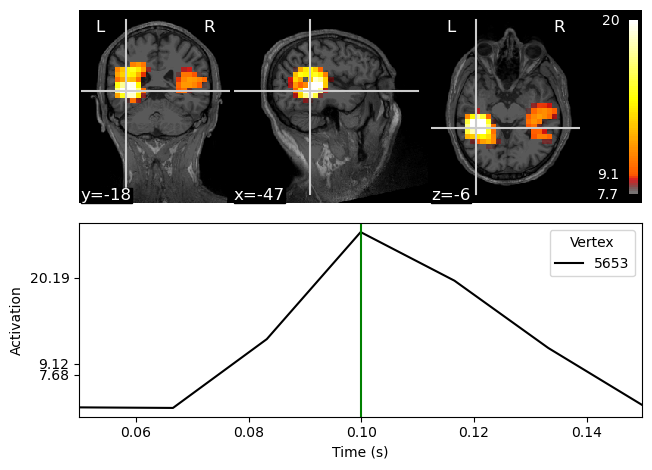

In [9]:
stc.plot(src, subject='sample', subjects_dir=subjects_dir)

Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.022485 -0.008449 -0.036217       5.60 mm
     0.071071  0.914866  0.406098     -19.82 mm
     0.008756 -0.433700  1.028119      -1.55 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 0.100 s, (-42.4, -43.1, -0.2) mm, [4, 9, 10] vox, 5653 vertex
Using control points [ 7.67635542  9.11717401 20.19136023]


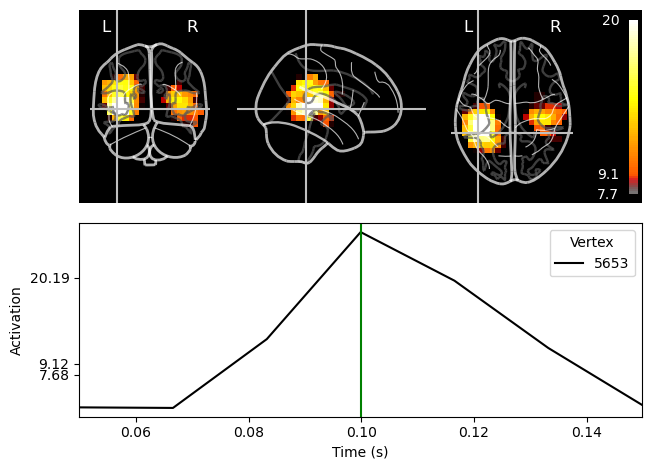

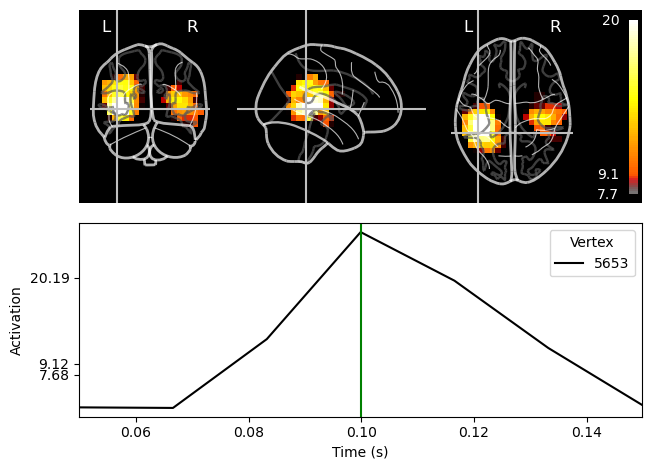

In [10]:
stc.plot(src, subject='sample', subjects_dir=subjects_dir, mode='glass_brain')

Reading atlas /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/mri/aparc+aseg.mgz
114/114 atlas regions had at least one vertex in the source space
Extracting time courses for 114 labels (mode: mean)


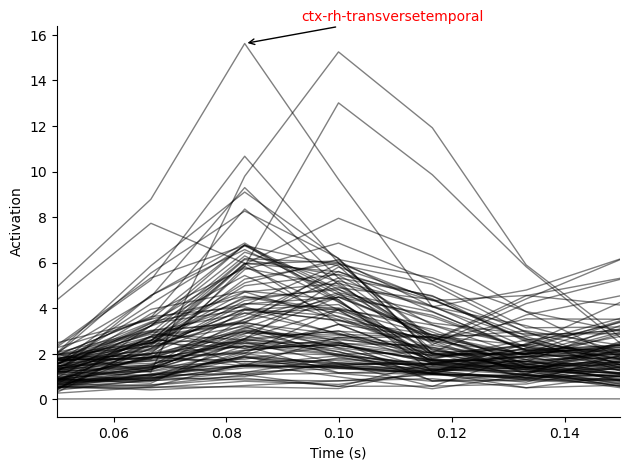

In [11]:
fname_aseg = op.join(subjects_dir, 'sample', 'mri', 'aparc+aseg.mgz')
label_names = mne.get_volume_labels_from_aseg(fname_aseg)
label_tc = stc.extract_label_time_course(fname_aseg, src=src)

lidx, tidx = np.unravel_index(np.argmax(label_tc), label_tc.shape)
fig, ax = plt.subplots(1)
ax.plot(stc.times, label_tc.T, 'k', lw=1., alpha=0.5)
xy = np.array([stc.times[tidx], label_tc[lidx, tidx]])
xytext = xy + [0.01, 1]
ax.annotate(
    label_names[lidx], xy, xytext, arrowprops=dict(arrowstyle='->'), color='r')
ax.set(xlim=stc.times[[0, -1]], xlabel='Time (s)', ylabel='Activation')
for key in ('right', 'top'):
    ax.spines[key].set_visible(False)
fig.tight_layout()

In [12]:
labels = [label_names[idx] for idx in np.argsort(label_tc.max(axis=1))[:7]
          if 'unknown' not in label_names[idx].lower()]  # remove catch-all
brain = mne.viz.Brain('sample', hemi='both', surf='pial', alpha=0.5,
                      cortex='low_contrast', subjects_dir=subjects_dir)
brain.add_volume_labels(aseg='aparc+aseg', labels=labels)
brain.show_view(azimuth=250, elevation=40, distance=400)

    Smoothing by a factor of 0.9


Reading atlas /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/mri/aparc+aseg.mgz
114/114 atlas regions had at least one vertex in the source space
Extracting time courses for 114 labels (mode: mean)
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.022485 -0.008449 -0.036217       5.60 mm
     0.071071  0.914866  0.406098     -19.82 mm
     0.008756 -0.433700  1.028119      -1.55 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 2.000 s, (36.1, -34.8, 7.7) mm, [15, 9, 11] vox, 6210 vertex
Using control points [ 5.69834054  5.98871778 15.62206532]


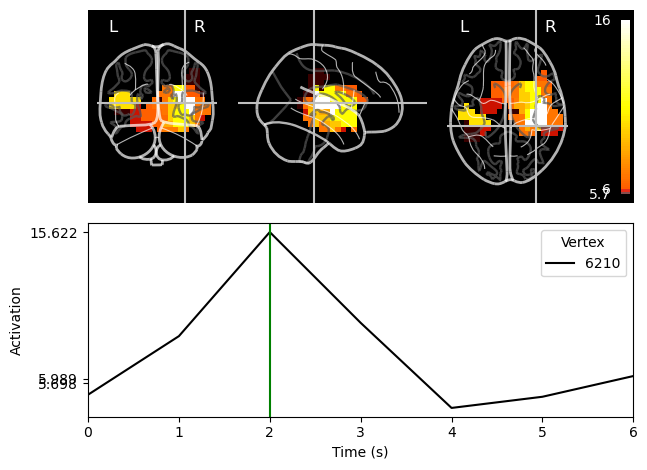

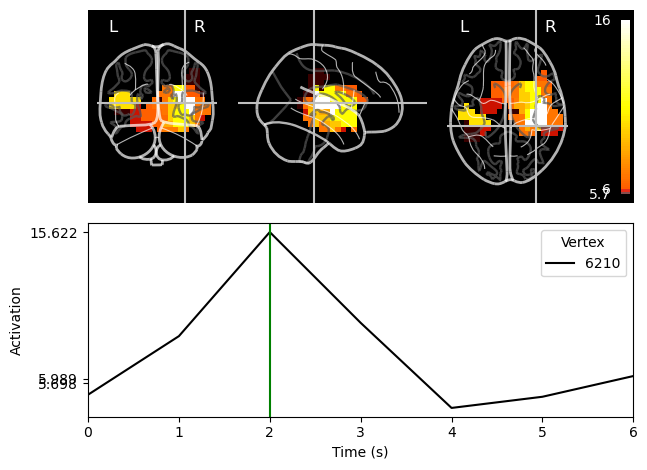

In [13]:
stc_back = mne.labels_to_stc(fname_aseg, label_tc, src=src)
stc_back.plot(src, subjects_dir=subjects_dir, mode='glass_brain')

In [ ]:
# vector source estimates

Reading inverse operator decomposition from /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing p

<IPython.core.display.Javascript object>


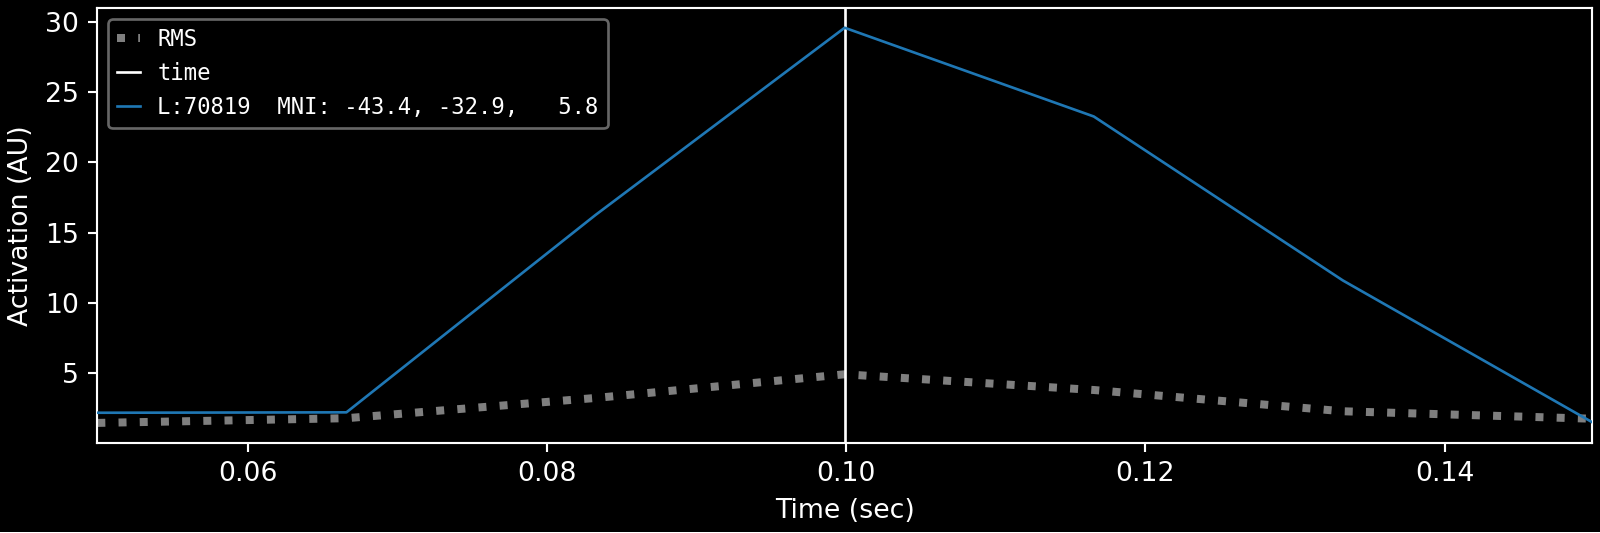

In [14]:
fname_inv = op.join(data_path, 'MEG', 'sample',
                    'sample_audvis-meg-oct-6-meg-inv.fif')
inv = read_inverse_operator(fname_inv)
stc = apply_inverse(evoked, inv, lambda2, 'dSPM', pick_ori='vector')
brain = stc.plot(subject='sample', subjects_dir=subjects_dir,
                 initial_time=initial_time, brain_kwargs=dict(
                     silhouette=True), smoothing_steps=7)

In [15]:
# dipole fits
fname_cov = meg_path / 'sample_audvis-cov.fif'
fname_bem = subjects_dir / 'sample' / 'bem' / 'sample-5120-bem-sol.fif'
fname_trans = meg_path / 'sample_audvis_raw-trans.fif'

evoked.crop(0.1, 0.1)
dip = mne.fit_dipole(evoked, fname_cov, fname_bem, fname_trans)[0]

BEM               : PosixPath('/Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-bem-sol.fif')
MRI transform     : /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw-trans.fif
Head origin       :   -4.3   18.4   67.0 mm rad =   71.8 mm.
Guess grid        :   20.0 mm
Guess mindist     :    5.0 mm
Guess exclude     :   20.0 mm
Using normal MEG coil definitions.
Noise covariance  : /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-cov.fif

Coordinate transformation: MRI (surface RAS) -> head
     0.999310  0.009985 -0.035787      -3.17 mm
     0.012759  0.812405  0.582954       6.86 mm
     0.034894 -0.583008  0.811716      28.88 mm
     0.000000  0.000000  0.000000       1.00
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 mm
     0.115790 -0.173570  0.977991      64.74 mm
     0.000000  0.000000  0.000000       1.00
0 bad channels total
Read 305 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found   9/168 points outside using solid angles
    Total 201/396 points inside the surface
Interior check completed in 276.0 ms
    195 source space points omitted because they are outside the inner skull surface.
    45 source space points omitted because of the    5.0-mm distance limit.
156 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Go through all guess source locations...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


[done 156 sources]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s fini

---- Fitted :    99.9 ms, distance to inner skull : 7.7099 mm
Projections have already been applied. Setting proj attribute to True.
1 time points fitted


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

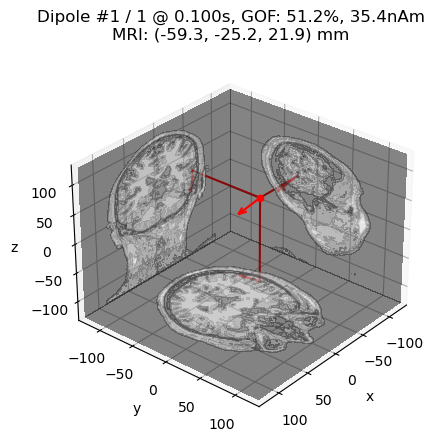

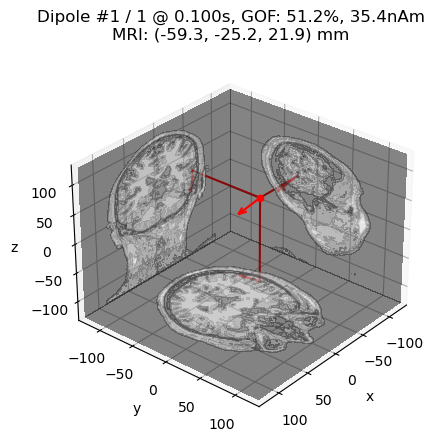

In [16]:
dip.plot_locations(fname_trans, 'sample', subjects_dir)

## EEG source localization given electrode location on MRI,

In [17]:
import nibabel
from nilearn.plotting import plot_glass_brain
import numpy as np

import mne
from mne.channels import compute_native_head_t, read_custom_montage
from mne.viz import plot_alignment

In [18]:
data_path = mne.datasets.sample.data_path()
subjects_dir = data_path / 'subjects'
fname_raw = data_path / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
bem_dir = subjects_dir / 'sample' / 'bem'
fname_bem = bem_dir / 'sample-5120-5120-5120-bem-sol.fif'
fname_src = bem_dir / 'sample-oct-6-src.fif'

misc_path = mne.datasets.misc.data_path()
fname_T1_electrodes = misc_path / 'sample_eeg_mri' / 'T1_electrodes.mgz'
fname_mon = misc_path / 'sample_eeg_mri' / 'sample_mri_montage.elc'

Using default location ~/mne_data for misc...
Dataset misc version 0.0 out of date, latest version is 0.23


0.00B [00:00, ?B/s]     
Untarring contents of '/Users/DanDan/mne_data/mne-misc-data-0.23.tar.gz' to '/Users/DanDan/mne_data'


In [ ]:
# VISUALIZING THE mri

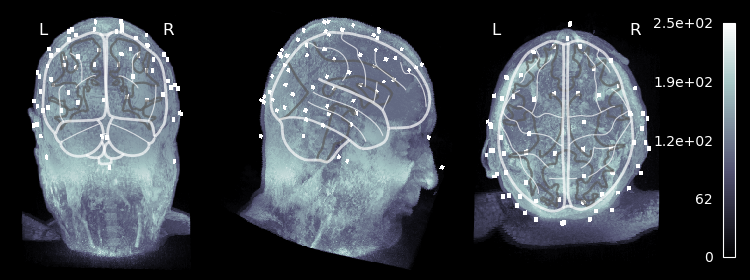

In [19]:
img = nibabel.load(fname_T1_electrodes)  # original subject MRI w/EEG
ras_mni_t = mne.transforms.read_ras_mni_t('sample', subjects_dir)  # from FS
mni_affine = np.dot(ras_mni_t['trans'], img.affine)  # vox->ras->MNI
img_mni = nibabel.Nifti1Image(img.dataobj, mni_affine)  # now in MNI coords!
plot_glass_brain(img_mni, cmap='hot_black_bone', threshold=0., black_bg=True,
                 resampling_interpolation='nearest', colorbar=True)

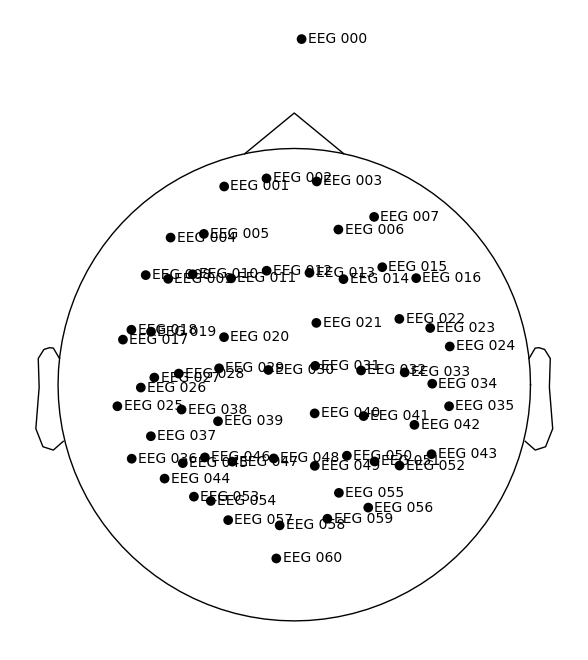

In [21]:
# GET eeg location

dig_montage = read_custom_montage(fname_mon, head_size=None, coord_frame='mri')
dig_montage.plot();

In [22]:
trans = compute_native_head_t(dig_montage)
print(trans)  # should be mri->head, as the "native" space here is MRI

<Transform | MRI (surface RAS)->head>
[[ 0.99930957  0.00998471 -0.03578661 -0.00316747]
 [ 0.01275917  0.81240435  0.58295487  0.00685511]
 [ 0.03489383 -0.58300899  0.81171605  0.02888406]
 [ 0.          0.          0.          1.        ]]


Opening raw data file /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


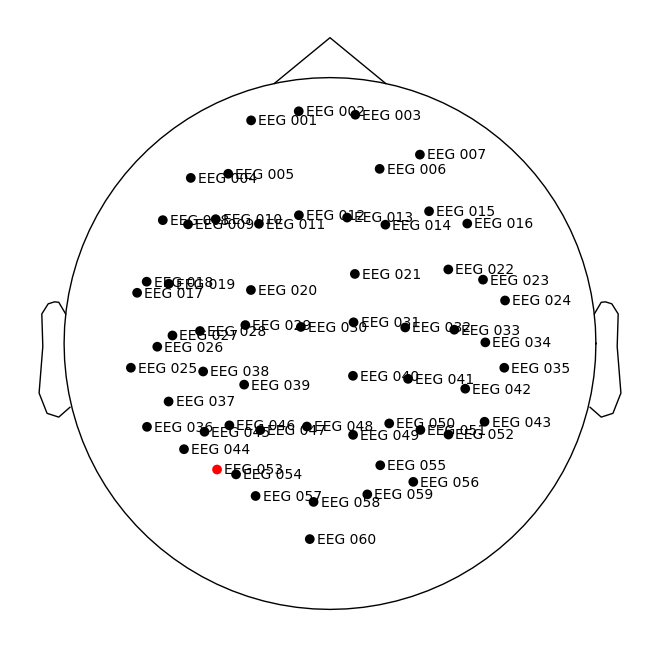

In [24]:
raw = mne.io.read_raw_fif(fname_raw)
raw.pick_types(meg=False, eeg=True, stim=True, exclude=()).load_data()
raw.set_montage(dig_montage)
raw.plot_sensors(show_names=True);

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 72 events and 421 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 73 events and 421 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 73 events and 421 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 71 events and 421 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 15 events and 421 original time points ...
0 bad epochs dropped
Using da

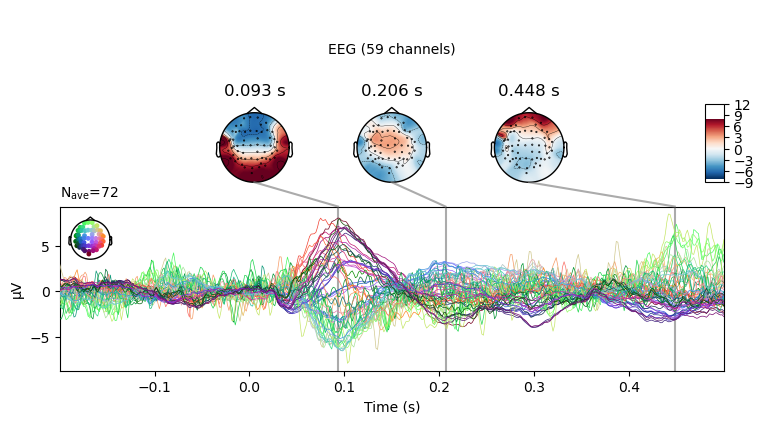

In [25]:
raw.set_eeg_reference(projection=True)
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events)
cov = mne.compute_covariance(epochs, tmax=0.)
evoked = epochs['1'].average()  # trigger 1 in auditory/left
evoked.plot_joint();

In [26]:
fig = plot_alignment(
    evoked.info, trans=trans, show_axes=True, surfaces='head-dense',
    subject='sample', subjects_dir=subjects_dir)

Using lh.seghead for head surface.
Channel types::	eeg: 59


In [27]:
fwd = mne.make_forward_solution(
    evoked.info, trans=trans, src=fname_src, bem=fname_bem, verbose=True);

Source space          : /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-oct-6-src.fif
MRI -> head transform : instance of Transform
Measurement data      : instance of Info
Conductor model   : /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-oct-6-src.fif...
Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999310  0.009985 -0.035787      -3.17 mm
     0.012759  0.812404  0.582955       6.86 mm
     0.034894 -0.583009  0.811716      28.88 mm
     0.000000  0.000000  0.000000       1.00

Read  60 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Setting up the BEM model using /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found    0/3250 points outside using solid angles
    Total 4096/4098 points inside the surface
Interior check completed in 2415.9 ms
    2 source space points omitted because they are outside the inner skull surface.
    Computing patch statistics...
    Patch information added...
Checking surface interior status for 4098 points...
    Found  875/4098 points inside  an interior sphere of radius   43.6 mm
    Found    0/4098 points outside an exterior sphere of radius   91.8 mm
    Found    0/3223 points outside using surface Qhull


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found    1/3223 point  outside using solid angles
    Total 4097/4098 points inside the surface
Interior check completed in 2261.5 ms
    1 source space point omitted because it is outside the inner skull surface.
    Computing patch statistics...
    Patch information added...

Setting up for EEG...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Computing EEG at 8193 source locations (free orientations)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Finished.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
info["bads"] and noise_cov["bads"] do not match, excluding bad channels from both
Computing inverse operator with 59 channels.
    59 out of 60 channels remain after picking
Selected 59 channels
Creating the depth weighting matrix...
    59 EEG channels
    limit = 8192/8193 = 10.040598
    scale = 157084 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 1)
Computing rank from covariance with rank=None
    Using tolerance 1.2e-13 (2.2e-16 eps * 59 dim * 9  max singular value)
    Estimated rank (eeg): 58
    EEG: rank 58 computed from 59 data channels with 1 projector
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting s

<IPython.core.display.Javascript object>


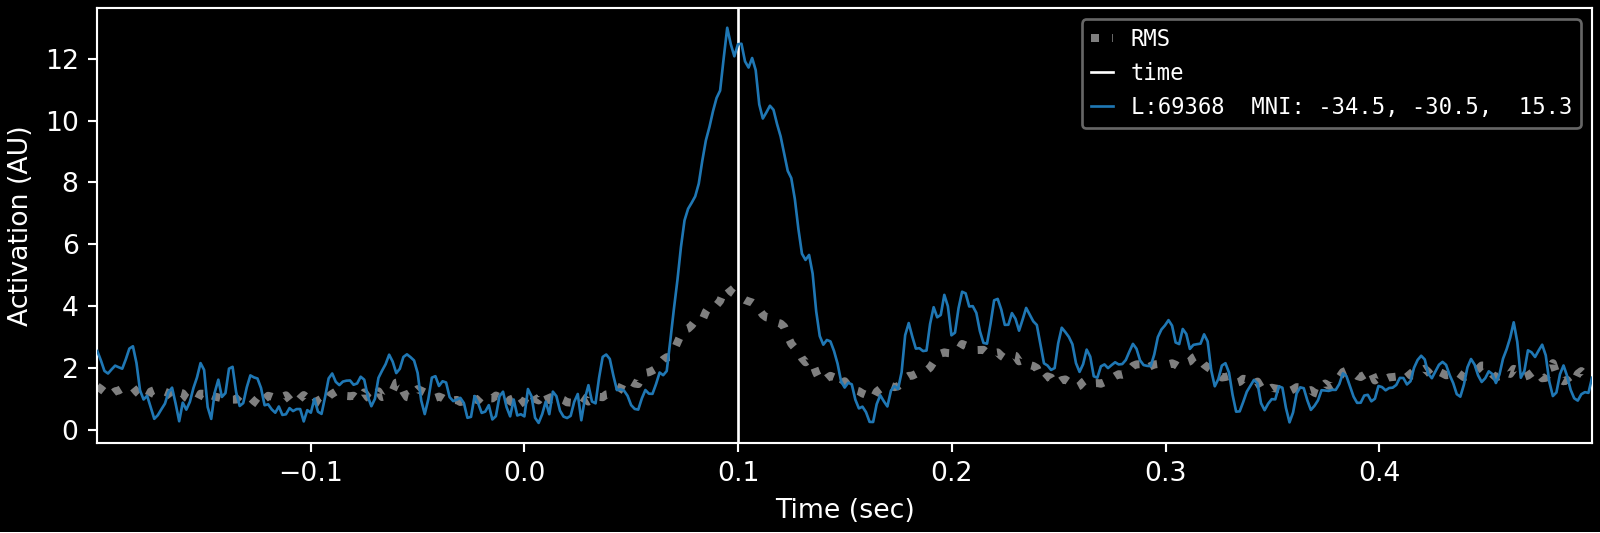

In [28]:
inv = mne.minimum_norm.make_inverse_operator(
    evoked.info, fwd, cov, verbose=True)
stc = mne.minimum_norm.apply_inverse(evoked, inv)
brain = stc.plot(subjects_dir=subjects_dir, initial_time=0.1)

## brainstorm Elekta phantom dataset 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne import find_events, fit_dipole
from mne.datasets import fetch_phantom
from mne.datasets.brainstorm import bst_phantom_elekta
from mne.io import read_raw_fif

print(__doc__)

Automatically created module for IPython interactive environment


In [31]:
data_path = bst_phantom_elekta.data_path(verbose=True)

raw_fname = data_path / 'kojak_all_200nAm_pp_no_chpi_no_ms_raw.fif'
raw = read_raw_fif(raw_fname)


License
-------
This tutorial dataset (EEG and MRI data) remains a property of the MEG Lab,
McConnell Brain Imaging Center, Montreal Neurological Institute,
McGill University, Canada. Its use and transfer outside the Brainstorm
tutorial, e.g. for research purposes, is prohibited without written consent
from the MEG Lab.

If you reference this dataset in your publications, please:

    1) acknowledge its authors: Elizabeth Bock, Esther Florin, Francois Tadel
       and Sylvain Baillet, and
    2) cite Brainstorm as indicated on the website:
       http://neuroimage.usc.edu/brainstorm

For questions, please contact Francois Tadel (francois.tadel@mcgill.ca).
Agree (y/[n])? y


100%|████████████████████████████████████████| 866M/866M [00:00<00:00, 960GB/s]
Untarring contents of '/Users/DanDan/mne_data/bst_phantom_elekta.tar.gz' to '/Users/DanDan/mne_data/MNE-brainstorm-data'


Opening raw data file /Users/DanDan/mne_data/MNE-brainstorm-data/bst_phantom_elekta/kojak_all_200nAm_pp_no_chpi_no_ms_raw.fif...
    Read a total of 13 projection items:
        planar-0.0-115.0-PCA-01 (1 x 306)  idle
        planar-0.0-115.0-PCA-02 (1 x 306)  idle
        planar-0.0-115.0-PCA-03 (1 x 306)  idle
        planar-0.0-115.0-PCA-04 (1 x 306)  idle
        planar-0.0-115.0-PCA-05 (1 x 306)  idle
        axial-0.0-115.0-PCA-01 (1 x 306)  idle
        axial-0.0-115.0-PCA-02 (1 x 306)  idle
        axial-0.0-115.0-PCA-03 (1 x 306)  idle
        axial-0.0-115.0-PCA-04 (1 x 306)  idle
        axial-0.0-115.0-PCA-05 (1 x 306)  idle
        axial-0.0-115.0-PCA-06 (1 x 306)  idle
        axial-0.0-115.0-PCA-07 (1 x 306)  idle
        axial-0.0-115.0-PCA-08 (1 x 306)  idle
    Range : 47000 ... 437999 =     47.000 ...   437.999 secs
Ready.


645 events found
Event IDs: [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32  256  768 1792 3840 7936]
Using matplotlib as 2D backend.


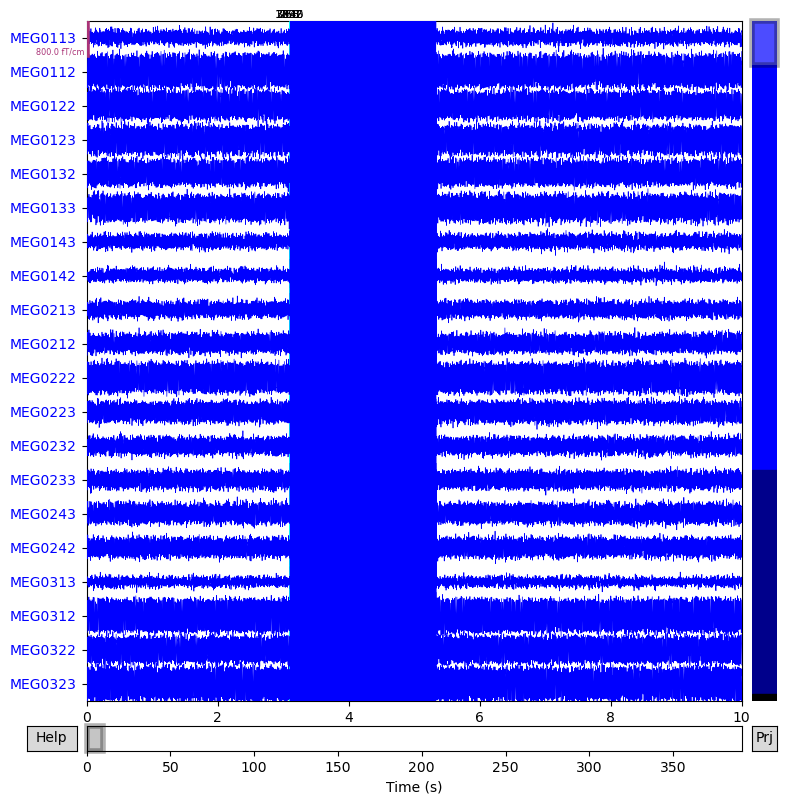

In [32]:
events = find_events(raw, 'STI201')
raw.plot(events=events)
raw.info['bads'] = ['MEG1933', 'MEG2421']

In [33]:
raw.plot_psd(tmax=30., average=False);

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.256 (s)


/Users/DanDan/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


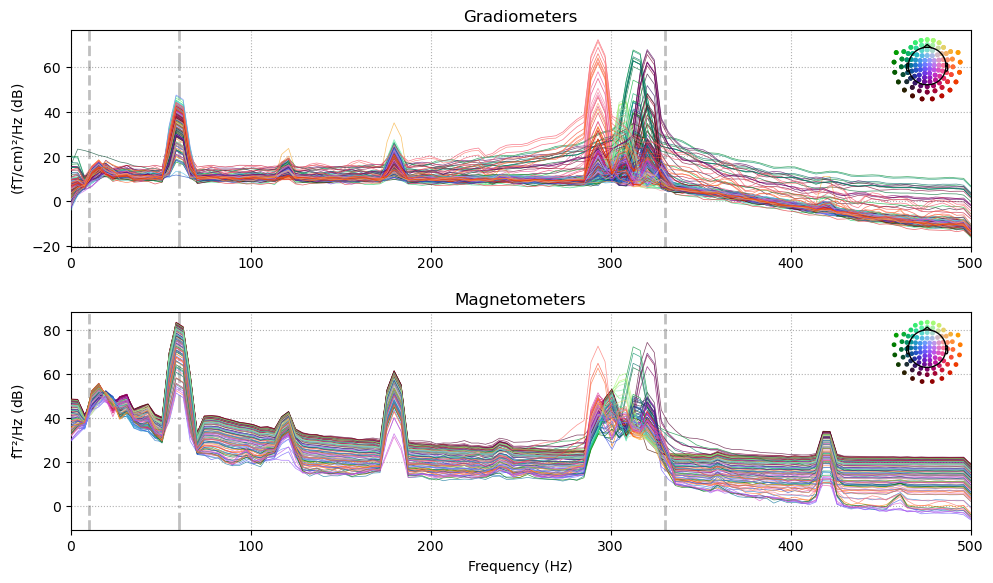

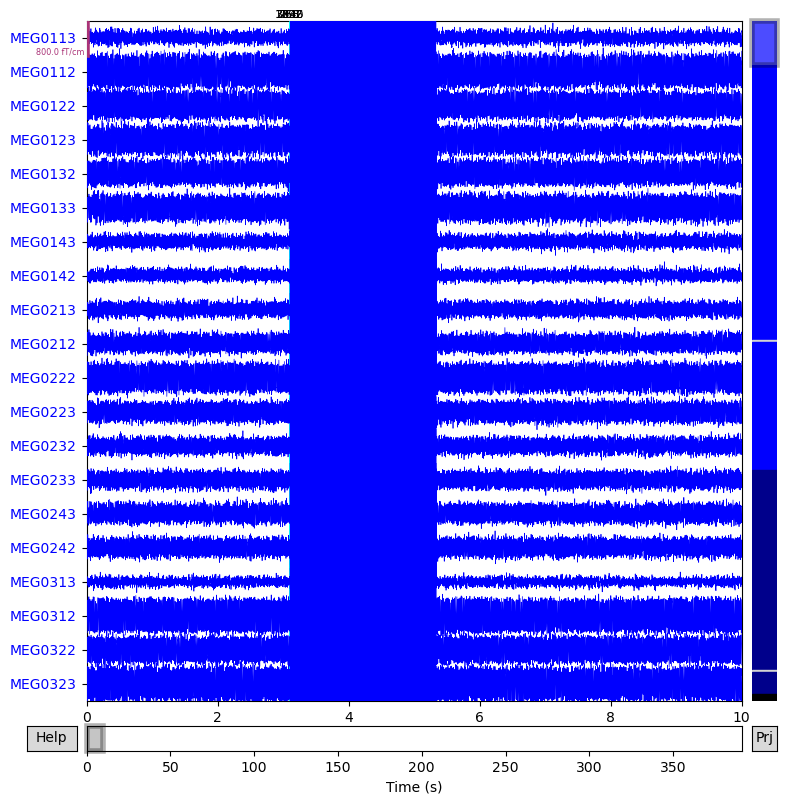

In [34]:
raw.plot(events=events);

Not setting metadata
640 matching events found
Setting baseline interval to [-0.1, -0.05] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated


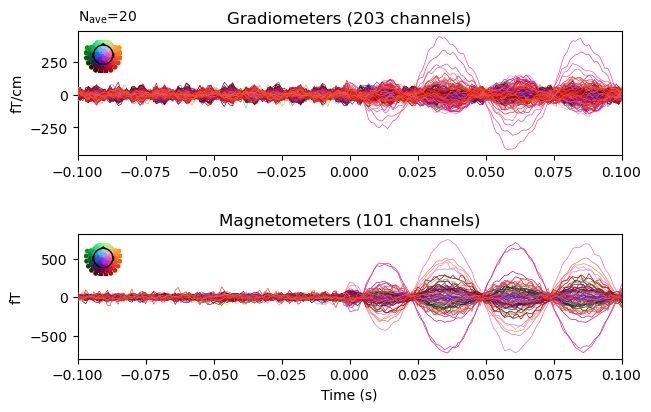

In [36]:
tmin, tmax = -0.1, 0.1
bmax = -0.05  # Avoid capture filter ringing into baseline
event_id = list(range(1, 33))
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=(None, bmax),
                    preload=False)
epochs['1'].average().plot(time_unit='s');

In [37]:
subjects_dir = data_path
fetch_phantom('otaniemi', subjects_dir=subjects_dir)
sphere = mne.make_sphere_model(r0=(0., 0., 0.), head_radius=0.08)
subject = 'phantom_otaniemi'
trans = mne.transforms.Transform('head', 'mri', np.eye(4))
mne.viz.plot_alignment(
    epochs.info, subject=subject, show_axes=True, bem=sphere, dig=True,
    surfaces=('head-dense', 'inner_skull'), trans=trans, mri_fiducials=True,
    subjects_dir=subjects_dir);

3 files missing from phantom_otaniemi.txt in /Users/DanDan/mne_data/MNE-brainstorm-data/bst_phantom_elekta


Extracting missing files
Successfully extracted 3 files

Equiv. model fitting -> RV = 0.00366515 %
mu1 = 0.944075    lambda1 = 0.138764
mu2 = 0.665854    lambda2 = 0.68457
mu3 = -0.128817    lambda3 = -0.0129641
Set up EEG sphere model with scalp radius    80.0 mm

Using lh.seghead for head surface.
Getting helmet for system 306m
Channel types::	grad: 203, mag: 101


Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events and 201 original time points ...
0 bad epochs dropped
Loading data for 20 events a

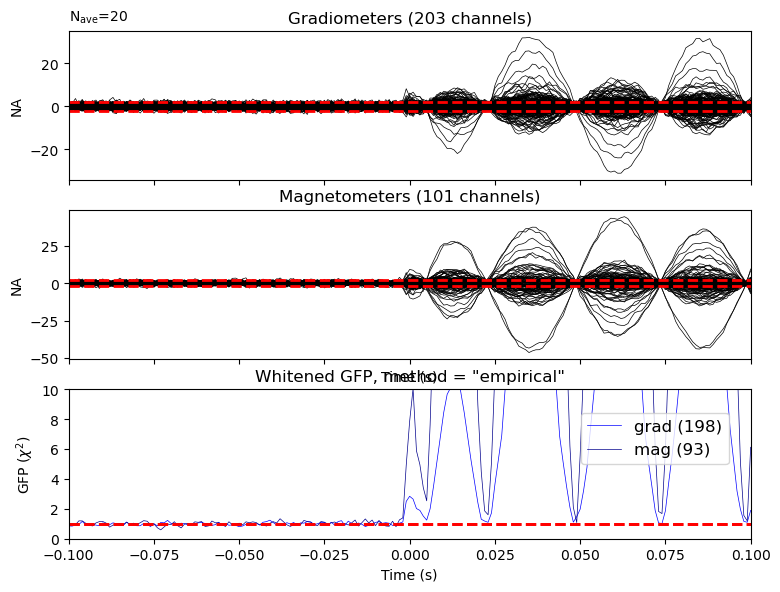

BEM               : <ConductorModel | Sphere (3 layers): r0=[0.0, 0.0, 0.0] R=80 mm>
MRI transform     : identity
Sphere model      : origin at (   0.00    0.00    0.00) mm, rad =    0.1 mm
Guess grid        :   20.0 mm
Guess mindist     :    5.0 mm
Guess exclude     :   20.0 mm
Using normal MEG coil definitions.
Noise covariance  : <Covariance | size : 304 x 304, n_samples : 32639, data : [[ 9.46889718e-23  1.93598841e-22  3.74717355e-25 ... -4.28179262e-23
  -1.89110781e-22  1.96010209e-24]
 [ 1.93598841e-22  6.67516457e-22  9.69201585e-25 ... -1.52612634e-22
  -6.28001139e-22  4.63818003e-24]
 [ 3.74717355e-25  9.69201585e-25  7.23712496e-27 ... -2.17313771e-25
  -1.08806500e-24  1.82282524e-26]
 ...
 [-4.28179262e-23 -1.52612634e-22 -2.17313771e-25 ...  6.40609794e-23
   1.46880665e-22 -1.06281874e-24]
 [-1.89110781e-22 -6.28001139e-22 -1.08806500e-24 ...  1.46880665e-22
   6.59033706e-22 -6.03817086e-24]
 [ 1.96010209e-24  4.63818003e-24  1.82282524e-26 ... -1.06281874e-24
  -6.03

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[done 170 sources]
---- Fitted :     0.0 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :     1.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :     2.0 ms
---- Fitted :     3.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :     4.0 ms
---- Fitted :     5.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :     6.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :     7.0 ms
---- Fitted :     8.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :     9.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    10.0 ms
---- Fitted :    11.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    12.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    13.0 ms
---- Fitted :    14.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    15.0 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

---- Fitted :    16.0 ms
---- Fitted :    17.0 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

---- Fitted :    18.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    19.0 ms
---- Fitted :    20.0 ms
---- Fitted :    21.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    22.0 ms
---- Fitted :    23.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    24.0 ms
---- Fitted :    25.0 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

---- Fitted :    26.0 ms
---- Fitted :    27.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    28.0 ms
---- Fitted :    29.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    30.0 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    31.0 ms
Projections have already been applied. Setting proj attribute to True.
32 time points fitted


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

In [38]:
# here we can get away with using method='oas' for speed (faster than "shrunk")
# but in general "shrunk" is usually better
cov = mne.compute_covariance(epochs, tmax=bmax)
mne.viz.plot_evoked_white(epochs['1'].average(), cov)

data = []
t_peak = 0.036  # true for Elekta phantom
for ii in event_id:
    # Avoid the first and last trials -- can contain dipole-switching artifacts
    evoked = epochs[str(ii)][1:-1].average().crop(t_peak, t_peak)
    data.append(evoked.data[:, 0])
evoked = mne.EvokedArray(np.array(data).T, evoked.info, tmin=0.)
del epochs
dip, residual = fit_dipole(evoked, cov, sphere, n_jobs=None);

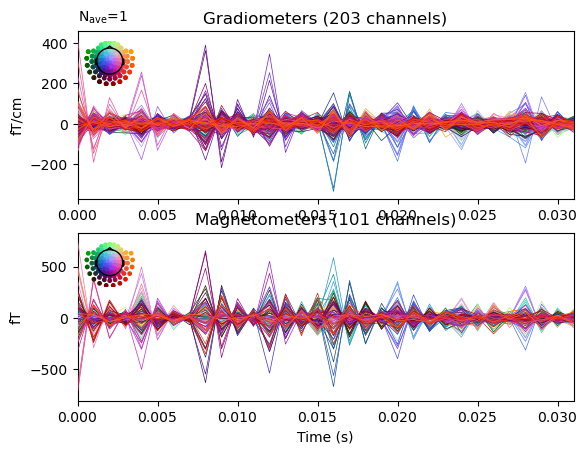

In [39]:
fig, axes = plt.subplots(2, 1)
evoked.plot(axes=axes)
for ax in axes:
    for text in list(ax.texts):
        text.remove()
    for line in ax.lines:
        line.set_color('#98df81')
residual.plot(axes=axes);

mean(position error) = 2.6 mm
mean(angle error) = 2.4°
mean(abs amplitude error) = 16.9 nAm


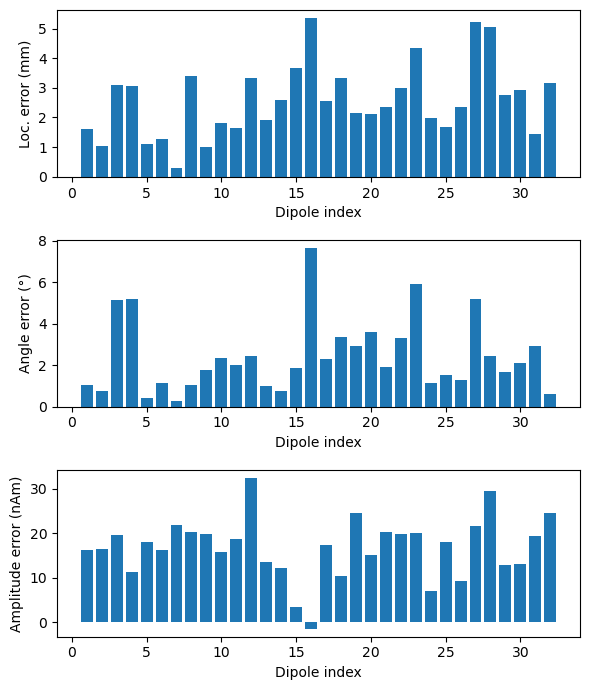

In [40]:
actual_pos, actual_ori = mne.dipole.get_phantom_dipoles()
actual_amp = 100.  # nAm

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(6, 7))

diffs = 1000 * np.sqrt(np.sum((dip.pos - actual_pos) ** 2, axis=-1))
print('mean(position error) = %0.1f mm' % (np.mean(diffs),))
ax1.bar(event_id, diffs)
ax1.set_xlabel('Dipole index')
ax1.set_ylabel('Loc. error (mm)')

angles = np.rad2deg(np.arccos(np.abs(np.sum(dip.ori * actual_ori, axis=1))))
print(u'mean(angle error) = %0.1f°' % (np.mean(angles),))
ax2.bar(event_id, angles)
ax2.set_xlabel('Dipole index')
ax2.set_ylabel(u'Angle error (°)')

amps = actual_amp - dip.amplitude / 1e-9
print('mean(abs amplitude error) = %0.1f nAm' % (np.mean(np.abs(amps)),))
ax3.bar(event_id, amps)
ax3.set_xlabel('Dipole index')
ax3.set_ylabel('Amplitude error (nAm)')

fig.tight_layout()
plt.show()

In [41]:
actual_amp = np.ones(len(dip))  # misc amp to create Dipole instance
actual_gof = np.ones(len(dip))  # misc GOF to create Dipole instance
dip_true = \
    mne.Dipole(dip.times, actual_pos, actual_amp, actual_ori, actual_gof)

fig = mne.viz.plot_alignment(
    evoked.info, trans, subject, bem=sphere, surfaces={'head-dense': 0.2},
    coord_frame='head', meg='helmet', show_axes=True,
    subjects_dir=subjects_dir)

# Plot the position and the orientation of the actual dipole
fig = mne.viz.plot_dipole_locations(dipoles=dip_true, mode='arrow',
                                    subject=subject, color=(0., 0., 0.),
                                    fig=fig)

# Plot the position and the orientation of the estimated dipole
fig = mne.viz.plot_dipole_locations(dipoles=dip, mode='arrow', subject=subject,
                                    color=(0.2, 1., 0.5), fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=70, elevation=80, distance=0.5)

Using lh.seghead for head surface.
Getting helmet for system 306m


# CTF phantom data

In [42]:
import warnings

import numpy as np
import matplotlib.pyplot as plt

import mne
from mne import fit_dipole
from mne.datasets.brainstorm import bst_phantom_ctf
from mne.io import read_raw_ctf

print(__doc__)

Automatically created module for IPython interactive environment


In [43]:
data_path = bst_phantom_ctf.data_path(verbose=True)

# Switch to these to use the higher-SNR data:
# raw_path = op.join(data_path, 'phantom_200uA_20150709_01.ds')
# dip_freq = 7.
raw_path = data_path / 'phantom_20uA_20150603_03.ds'
dip_freq = 23.
erm_path = data_path / 'emptyroom_20150709_01.ds'
raw = read_raw_ctf(raw_path, preload=True)


License
-------
This tutorial dataset (EEG and MRI data) remains a property of the MEG Lab,
McConnell Brain Imaging Center, Montreal Neurological Institute,
McGill University, Canada. Its use and transfer outside the Brainstorm
tutorial, e.g. for research purposes, is prohibited without written consent
from the MEG Lab.

If you reference this dataset in your publications, please:

    1) acknowledge its authors: Elizabeth Bock, Esther Florin, Francois Tadel
       and Sylvain Baillet, and
    2) cite Brainstorm as indicated on the website:
       http://neuroimage.usc.edu/brainstorm

For questions, please contact Francois Tadel (francois.tadel@mcgill.ca).
Agree (y/[n])? y


100%|█████████████████████████████████████| 86.8M/86.8M [00:00<00:00, 92.5GB/s]
Untarring contents of '/Users/DanDan/mne_data/bst_phantom_ctf.tar.gz' to '/Users/DanDan/mne_data/MNE-brainstorm-data'


ds directory : /Users/DanDan/mne_data/MNE-brainstorm-data/bst_phantom_ctf/phantom_20uA_20150603_03.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
      -0.39   74.35    0.00 mm <->   -0.39   74.35   -0.00 mm (orig :  -39.23   63.82 -204.07 mm) diff =    0.000 mm
       0.39  -74.35    0.00 mm <->    0.39  -74.35   -0.00 mm (orig :   65.69  -41.53 -205.68 mm) diff =    0.000 mm
      75.00    0.00    0.00 mm <->   75.00   -0.00    0.00 mm (orig :   64.32   61.80 -226.08 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /Users/DanDan/mne_data/MNE-brainstorm-data/bst_phantom_ctf/phantom_20uA_20150603_03.ds/phantom_20uA_20150603_03.meg4: 
    System clock channel is available, checking which samples are valid.
    10 x 2400 = 24000 samples from 

In [44]:
sinusoid, times = raw[raw.ch_names.index('HDAC006-4408')]
plt.figure()
plt.plot(times[times < 1.], sinusoid.T[times < 1.])

In [45]:
events = np.where(np.diff(sinusoid > 0.5) > 0)[1] + raw.first_samp
events = np.vstack((events, np.zeros_like(events), np.ones_like(events))).T

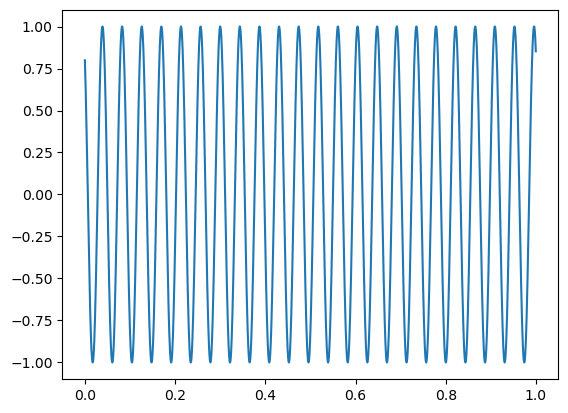

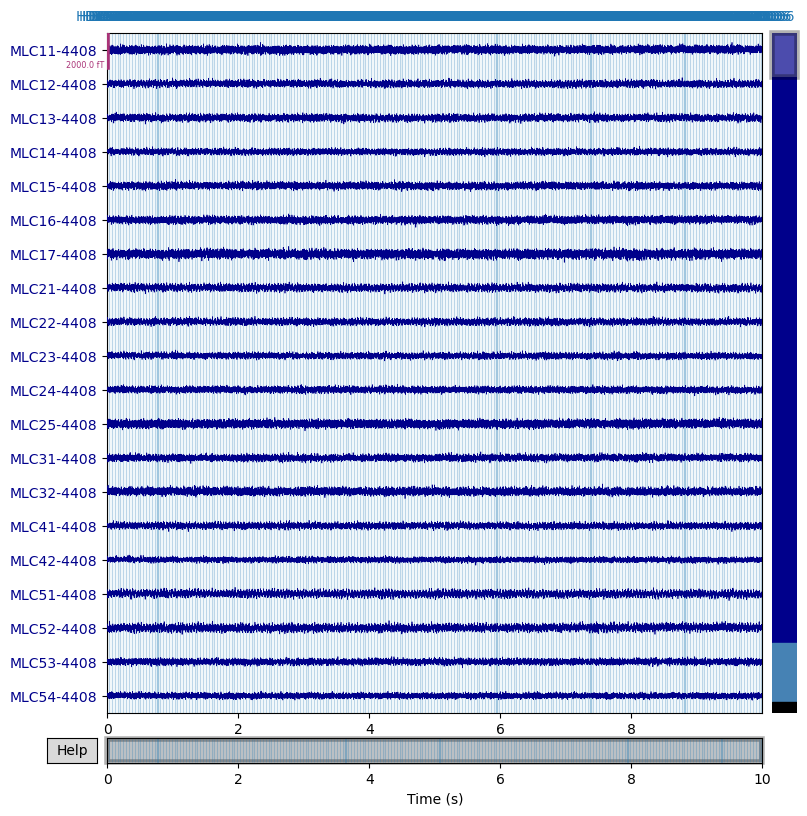

In [46]:
raw.plot();

Compensator constructed to change 3 -> 0
Applying compensator to loaded data
Maxwell filtering raw data
    No bad MEG channels
    Processing 0 gradiometers and 299 magnetometers (of which 290 are actually KIT gradiometers)
    Using origin 0.0, 0.0, 0.0 mm in the head frame
    Processing data using tSSS with st_duration=10.0
        Using 86/95 harmonic components for    0.000  (71/80 in, 15/15 out)
    Using loaded raw data
    Processing 1 data chunk
        Projecting  8 intersecting tSSS components for    0.000 -   10.000 sec (#1/1)
[done]


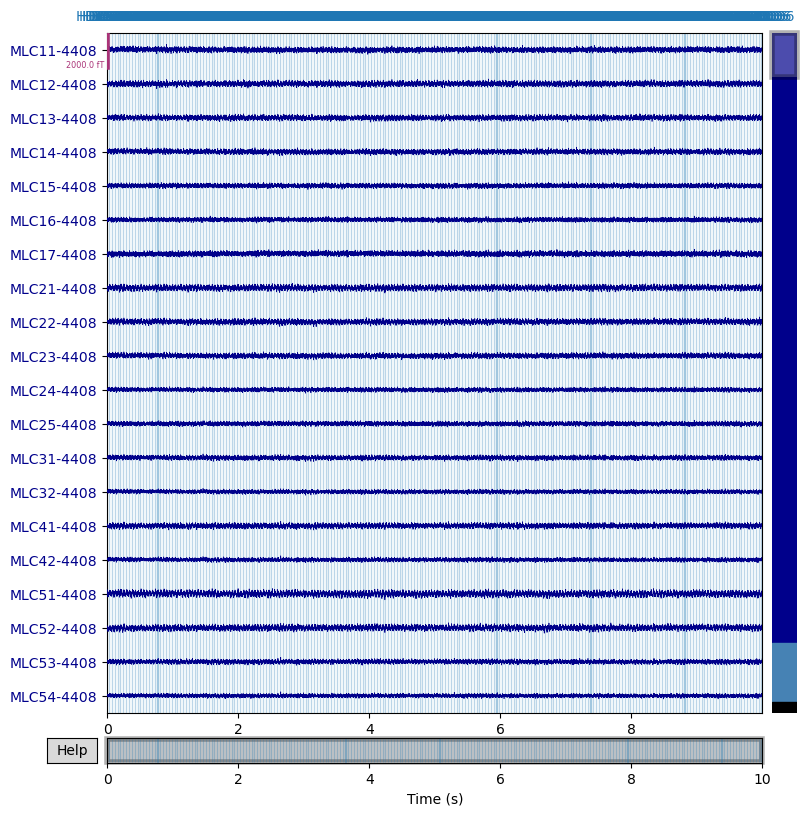

In [47]:
raw.apply_gradient_compensation(0)  # must un-do software compensation first
mf_kwargs = dict(origin=(0., 0., 0.), st_duration=10.)
raw = mne.preprocessing.maxwell_filter(raw, **mf_kwargs)
raw.plot();

Not setting metadata
460 matching events found
Setting baseline interval to [-0.021666666666666667, 0.021666666666666667] sec
Applying baseline correction (mode: mean)
0 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


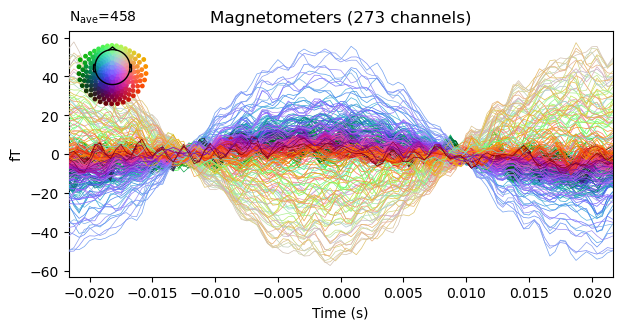

<Evoked | '1' (average, N=458), 0 – 0 sec, baseline -0.0216667 – 0.0216667 sec (baseline period was cropped after baseline correction), 299 ch, ~538 kB>

In [48]:
tmin = -0.5 / dip_freq
tmax = -tmin
epochs = mne.Epochs(raw, events, event_id=1, tmin=tmin, tmax=tmax,
                    baseline=(None, None))
evoked = epochs.average()
evoked.plot(time_unit='s')
evoked.crop(0., 0.)

In [49]:
sphere = mne.make_sphere_model(r0=(0., 0., 0.), head_radius=0.08)

mne.viz.plot_alignment(raw.info, subject='sample',
                       meg='helmet', bem=sphere, dig=True,
                       surfaces=['brain'])
del raw, epochs


Equiv. model fitting -> RV = 0.00366515 %
mu1 = 0.944075    lambda1 = 0.138764
mu2 = 0.665854    lambda2 = 0.68457
mu3 = -0.128817    lambda3 = -0.0129641
Set up EEG sphere model with scalp radius    80.0 mm

Getting helmet for system CTF_275


In [50]:
raw_erm = read_raw_ctf(erm_path).apply_gradient_compensation(0)
raw_erm = mne.preprocessing.maxwell_filter(raw_erm, coord_frame='meg',
                                           **mf_kwargs)
cov = mne.compute_raw_covariance(raw_erm)
del raw_erm

with warnings.catch_warnings(record=True):
    # ignore warning about data rank exceeding that of info (75 > 71)
    warnings.simplefilter('ignore')
    dip, residual = fit_dipole(evoked, cov, sphere, verbose=True)

ds directory : /Users/DanDan/mne_data/MNE-brainstorm-data/bst_phantom_ctf/emptyroom_20150709_01.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
      -0.00   74.50    0.00 mm <->   -0.00   74.50   -0.00 mm (orig :  -50.17   57.61 -188.51 mm) diff =    0.000 mm
       0.00  -74.50    0.00 mm <->    0.00  -74.50   -0.00 mm (orig :   60.49  -42.15 -190.81 mm) diff =    0.000 mm
      74.66    0.00    0.00 mm <->   74.66   -0.00   -0.00 mm (orig :   53.03   61.29 -209.99 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /Users/DanDan/mne_data/MNE-brainstorm-data/bst_phantom_ctf/emptyroom_20150709_01.ds/emptyroom_20150709_01.meg4: 
    System clock channel is available, checking which samples are valid.
    100 x 600 = 60000 samples from 304 chs
C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s fini

---- Fitted :     0.0 ms
No projector specified for this dataset. Please consider the method self.add_proj.
1 time points fitted


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

In [51]:
expected_pos = np.array([18., 0., 49.])
diff = np.sqrt(np.sum((dip.pos[0] * 1000 - expected_pos) ** 2))
print('Actual pos:     %s mm' % np.array_str(expected_pos, precision=1))
print('Estimated pos:  %s mm' % np.array_str(dip.pos[0] * 1000, precision=1))
print('Difference:     %0.1f mm' % diff)
print('Amplitude:      %0.1f nAm' % (1e9 * dip.amplitude[0]))
print('GOF:            %0.1f %%' % dip.gof[0])

Actual pos:     [18.  0. 49.] mm
Estimated pos:  [18.5 -2.2 44.6] mm
Difference:     4.9 mm
Amplitude:      10.0 nAm
GOF:            96.5 %


## 4D neuroimaging/BTi phantom data

import os.path as op
import numpy as np
from mne.datasets import phantom_4dbti
import mne

Using default location ~/mne_data for phantom_4dbti...


100%|█████████████████████████████████████| 68.2M/68.2M [00:00<00:00, 66.1GB/s]
Unzipping contents of '/Users/DanDan/mne_data/MNE-phantom-4DBTi.zip' to '/Users/DanDan/mne_data'



Equiv. model fitting -> RV = 0.00366515 %
mu1 = 0.944075    lambda1 = 0.138764
mu2 = 0.665854    lambda2 = 0.68457
mu3 = -0.128817    lambda3 = -0.0129641
Set up EEG sphere model with scalp radius    80.0 mm

Reading 4D PDF file /Users/DanDan/mne_data/MNE-phantom-4DBTi/1/e,rfhp1.0Hz...
Creating Neuromag info structure ...
... Setting channel info structure.
... putting coil transforms in Neuromag coordinates
... Reading digitization points from /Users/DanDan/mne_data/MNE-phantom-4DBTi/1/hs_file
Currently direct inclusion of 4D weight tables is not supported. For critical use cases please take into account the MNE command "mne_create_comp_data" to include weights as printed out by the 4D "print_table" routine.
Reading 0 ... 13599  =      0.000 ...    20.052 secs...
Trigger channel has a non-zero initial value of 4350 (consider using initial_event=True to detect this event)
50 events found
Event IDs: [8192]
Not setting metadata
50 matching events found
Setting baseline interval to [-0.2

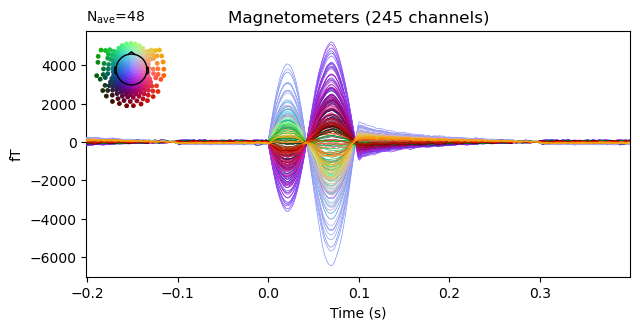

Computing rank from data with rank=None
    Using tolerance 3.7e-09 (2.2e-16 eps * 245 dim * 6.9e+04  max singular value)
    Estimated rank (mag): 245
    MAG: rank 245 computed from 245 data channels with 0 projectors
Reducing data rank from 245 -> 245
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 6576
[done]
BEM               : <ConductorModel | Sphere (3 layers): r0=[0.0, 0.0, 0.0] R=80 mm>
MRI transform     : identity
Sphere model      : origin at (   0.00    0.00    0.00) mm, rad =    0.1 mm
Guess grid        :   20.0 mm
Guess mindist     :    5.0 mm
Guess exclude     :   20.0 mm
Using normal MEG coil definitions.
Noise covariance  : <Covariance | size : 245 x 245, n_samples : 6575, data : [[ 9.50691838e-27  3.61763336e-27 -3.91409625e-28 ... -1.91576159e-27
  -8.16898444e-28 -1.75585208e-27]
 [ 3.61763336e-27  1.47442194e-26  1.45272203e-26 ...  2.55529894e-27
   3.46448717e-28  3.88484744e-27]
 [-3.91409625e-28  1.45272203e-26  3.05130802e-26 ...  6.14443

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s fini

---- Fitted :    69.3 ms
No projector specified for this dataset. Please consider the method self.add_proj.
1 time points fitted
Reading 4D PDF file /Users/DanDan/mne_data/MNE-phantom-4DBTi/2/e,rfhp1.0Hz...
Creating Neuromag info structure ...
... Setting channel info structure.
... putting coil transforms in Neuromag coordinates


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

... Reading digitization points from /Users/DanDan/mne_data/MNE-phantom-4DBTi/2/hs_file
Currently direct inclusion of 4D weight tables is not supported. For critical use cases please take into account the MNE command "mne_create_comp_data" to include weights as printed out by the 4D "print_table" routine.
Reading 0 ... 13599  =      0.000 ...    20.052 secs...
Trigger channel has a non-zero initial value of 4350 (consider using initial_event=True to detect this event)
50 events found
Event IDs: [8192]
Not setting metadata
50 matching events found
Setting baseline interval to [-0.20053968578577042, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 50 events and 408 original time points ...
2 bad epochs dropped


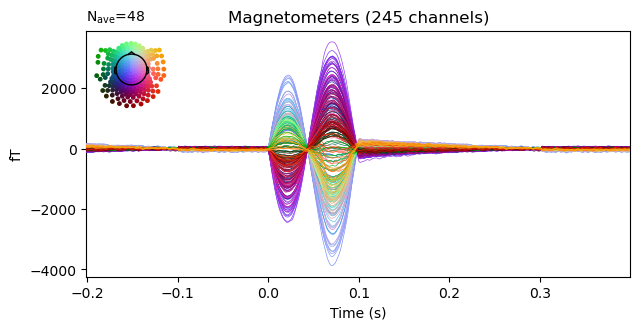

Computing rank from data with rank=None
    Using tolerance 3.5e-09 (2.2e-16 eps * 245 dim * 6.4e+04  max singular value)
    Estimated rank (mag): 245
    MAG: rank 245 computed from 245 data channels with 0 projectors
Reducing data rank from 245 -> 245
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 6576
[done]
BEM               : <ConductorModel | Sphere (3 layers): r0=[0.0, 0.0, 0.0] R=80 mm>
MRI transform     : identity
Sphere model      : origin at (   0.00    0.00    0.00) mm, rad =    0.1 mm
Guess grid        :   20.0 mm
Guess mindist     :    5.0 mm
Guess exclude     :   20.0 mm
Using normal MEG coil definitions.
Noise covariance  : <Covariance | size : 245 x 245, n_samples : 6575, data : [[ 9.43530566e-27  6.00499851e-27  3.47056513e-27 ...  1.49717001e-28
   1.01651220e-28 -6.39837298e-28]
 [ 6.00499851e-27  1.09320996e-26  9.53068976e-27 ...  2.44272962e-27
   2.07218608e-27  1.57916869e-27]
 [ 3.47056513e-27  9.53068976e-27  2.24522939e-26 ...  4.45459

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s fini

---- Fitted :    69.3 ms
No projector specified for this dataset. Please consider the method self.add_proj.
1 time points fitted
Reading 4D PDF file /Users/DanDan/mne_data/MNE-phantom-4DBTi/3/e,rfhp1.0Hz...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Creating Neuromag info structure ...
... Setting channel info structure.
... putting coil transforms in Neuromag coordinates
... Reading digitization points from /Users/DanDan/mne_data/MNE-phantom-4DBTi/3/hs_file
Currently direct inclusion of 4D weight tables is not supported. For critical use cases please take into account the MNE command "mne_create_comp_data" to include weights as printed out by the 4D "print_table" routine.
Reading 0 ... 13599  =      0.000 ...    20.052 secs...
Trigger channel has a non-zero initial value of 4350 (consider using initial_event=True to detect this event)
50 events found
Event IDs: [8192]
Not setting metadata
50 matching events found
Setting baseline interval to [-0.20053968578577042, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 50 events and 408 original time points ...
2 bad epochs dropped


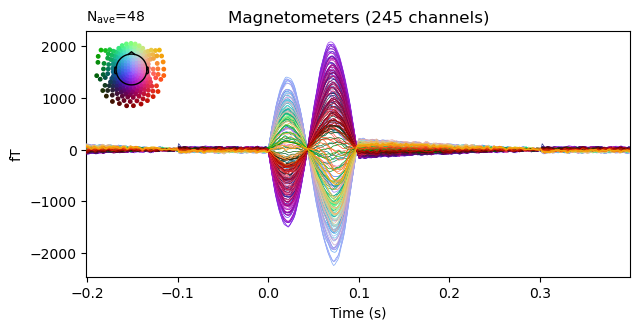

Computing rank from data with rank=None
    Using tolerance 2.6e-09 (2.2e-16 eps * 245 dim * 4.7e+04  max singular value)
    Estimated rank (mag): 245
    MAG: rank 245 computed from 245 data channels with 0 projectors
Reducing data rank from 245 -> 245
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 6576
[done]
BEM               : <ConductorModel | Sphere (3 layers): r0=[0.0, 0.0, 0.0] R=80 mm>
MRI transform     : identity
Sphere model      : origin at (   0.00    0.00    0.00) mm, rad =    0.1 mm
Guess grid        :   20.0 mm
Guess mindist     :    5.0 mm
Guess exclude     :   20.0 mm
Using normal MEG coil definitions.
Noise covariance  : <Covariance | size : 245 x 245, n_samples : 6575, data : [[ 6.58999814e-27  3.84421337e-27  1.28166457e-27 ...  9.67818745e-29
  -3.17428979e-28 -3.76211498e-28]
 [ 3.84421337e-27  7.09542089e-27  3.22401648e-27 ...  1.04141267e-27
   7.15865669e-28  9.76599754e-28]
 [ 1.28166457e-27  3.22401648e-27  1.17446488e-26 ...  1.49708

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s fini

---- Fitted :    69.3 ms
No projector specified for this dataset. Please consider the method self.add_proj.
1 time points fitted
Reading 4D PDF file /Users/DanDan/mne_data/MNE-phantom-4DBTi/4/e,rfhp1.0Hz...
Creating Neuromag info structure ...
... Setting channel info structure.
... putting coil transforms in Neuromag coordinates
... Reading digitization points from /Users/DanDan/mne_data/MNE-phantom-4DBTi/4/hs_file
Currently direct inclusion of 4D weight tables is not supported. For critical use cases please take into account the MNE command "mne_create_comp_data" to include weights as printed out by the 4D "print_table" routine.
Reading 0 ... 13599  =      0.000 ...    20.052 secs...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Trigger channel has a non-zero initial value of 4350 (consider using initial_event=True to detect this event)
50 events found
Event IDs: [8192]
Not setting metadata
50 matching events found
Setting baseline interval to [-0.20053968578577042, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 50 events and 408 original time points ...
2 bad epochs dropped


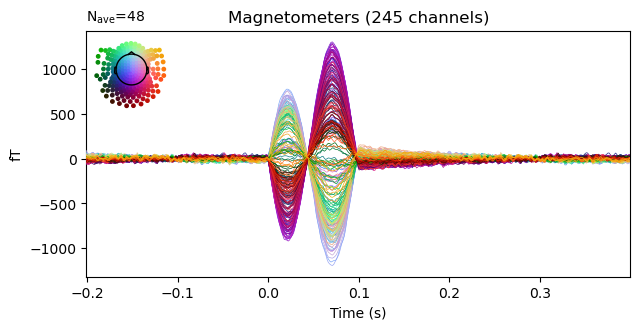

Computing rank from data with rank=None
    Using tolerance 2.8e-09 (2.2e-16 eps * 245 dim * 5.1e+04  max singular value)
    Estimated rank (mag): 245
    MAG: rank 245 computed from 245 data channels with 0 projectors
Reducing data rank from 245 -> 245
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 6576
[done]
BEM               : <ConductorModel | Sphere (3 layers): r0=[0.0, 0.0, 0.0] R=80 mm>
MRI transform     : identity
Sphere model      : origin at (   0.00    0.00    0.00) mm, rad =    0.1 mm
Guess grid        :   20.0 mm
Guess mindist     :    5.0 mm
Guess exclude     :   20.0 mm
Using normal MEG coil definitions.
Noise covariance  : <Covariance | size : 245 x 245, n_samples : 6575, data : [[ 8.40101009e-27  5.10513936e-27  3.52303974e-27 ...  4.27457778e-28
   5.38233857e-28  1.06793751e-28]
 [ 5.10513936e-27  8.00477278e-27  4.15792686e-27 ...  1.30206685e-28
  -1.40306943e-28 -4.32057779e-28]
 [ 3.52303974e-27  4.15792686e-27  1.22353020e-26 ... -1.11884

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s fini

1 time points fitted


In [53]:
data_path = phantom_4dbti.data_path()
raw_fname = op.join(data_path, '%d/e,rfhp1.0Hz')

dipoles = list()
sphere = mne.make_sphere_model(r0=(0., 0., 0.), head_radius=0.080)

t0 = 0.07  # peak of the response

pos = np.empty((4, 3))
ori = np.empty((4, 3))

for ii in range(4):
    raw = mne.io.read_raw_bti(raw_fname % (ii + 1,),
                              rename_channels=False, preload=True)
    raw.info['bads'] = ['A173', 'A213', 'A232']
    events = mne.find_events(raw, 'TRIGGER', mask=4350, mask_type='not_and')
    epochs = mne.Epochs(raw, events=events, event_id=8192, tmin=-0.2, tmax=0.4,
                        preload=True)
    evoked = epochs.average()
    evoked.plot(time_unit='s')
    cov = mne.compute_covariance(epochs, tmax=0.)
    dip = mne.fit_dipole(evoked.copy().crop(t0, t0), cov, sphere)[0]
    pos[ii] = dip.pos[0]
    ori[ii] = dip.ori[0]

In [54]:
# localization errors
actual_pos = 0.01 * np.array([[0.16, 1.61, 5.13],
                              [0.17, 1.35, 4.15],
                              [0.16, 1.05, 3.19],
                              [0.13, 0.80, 2.26]])
actual_pos = np.dot(actual_pos, [[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

errors = 1e3 * np.linalg.norm(actual_pos - pos, axis=1)
print("errors (mm) : %s" % errors)

errors (mm) : [1.44409481 1.37628851 1.24574753 1.20575864]


In [55]:
# plot dipoles in 
actual_amp = np.ones(len(dip))  # misc amp to create Dipole instance
actual_gof = np.ones(len(dip))  # misc GOF to create Dipole instance
dip = mne.Dipole(dip.times, pos, actual_amp, ori, actual_gof)
dip_true = mne.Dipole(dip.times, actual_pos, actual_amp, ori, actual_gof)

fig = mne.viz.plot_alignment(evoked.info, bem=sphere, surfaces=[])

# Plot the position of the actual dipole
fig = mne.viz.plot_dipole_locations(dipoles=dip_true, mode='sphere',
                                    color=(1., 0., 0.), fig=fig)
# Plot the position of the estimated dipole
fig = mne.viz.plot_dipole_locations(dipoles=dip, mode='sphere',
                                    color=(1., 1., 0.), fig=fig)

Getting helmet for system Magnes_3600wh
Channel types::	mag: 245
